##STUDENT = UFUK CEM BIRBIRI

## Exam 22/03/2019


We work with the database ADNI, containing information for a clinical cohort of healhty volunteers and patients with Alzheimer's disease.

In [344]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/data.csv')
dataset[:10]

,Unnamed: 0,RID,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG,DX
0,1,2,0.004200,74.3,1,16,10.67,1.369264,NL
1,16,3,0.002769,81.3,1,18,22.00,1.090790,Dementia
2,27,5,0.004312,73.7,1,16,8.67,1.297990,NL
3,46,8,0.004355,84.5,2,18,5.00,1.276278,NL
4,60,10,0.003728,73.9,2,12,12.33,1.118814,Dementia
5,65,14,0.005301,78.5,2,12,4.33,1.256990,NL
6,80,16,0.005406,65.4,1,9,10.33,1.395434,NL
7,93,21,0.005607,72.6,2,18,6.67,1.382790,NL
8,114,23,0.005298,71.7,1,14,4.00,1.364222,NL
9,221,43,0.004564,76.2,1,16,7.00,1.308406,NL


Data fields:
- RID: subject's identifier
- Hippocampus_volume = normalized volume of the brain region hippocampus
- AGE: subject's age
- PTGENDER: subject's sex (1 Male, 2 Female)
- PTEDUCAT: years of education
- ADAS11: clinical score (Alzheimer's disease assessment scale)
- FDG: measure of average brain metabolism
- DX: clinical diagnosis. In order to severity we have NL (normal), MCI (mild cognitive impairment), and Dementia

__Exercise 1 (2 pts).__ Estimate mean and standard deviation for the classification accuracy of the algorithms Logistic Regression and Nearest Neighbours classifier for predicting clinical diagnosis based on the variables Hippocampus_volume, AGE, PTGENDER, PTEDUCAT, ADAS11, and FDG. (use at least 1000 repetitions)

In [345]:
#import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline,make_pipeline
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.compose import make_column_selector as selector
from numpy import mean,std,absolute
from pandas import read_csv
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score,KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import random_projection
from sklearn import datasets, cluster

In [346]:
X = dataset[["Hippocampus_volume", "AGE", "PTGENDER", "PTEDUCAT", "ADAS11", "FDG"]]
y = dataset[["DX"]]
X

,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG
0,0.004200,74.3,1,16,10.67,1.369264
1,0.002769,81.3,1,18,22.00,1.090790
2,0.004312,73.7,1,16,8.67,1.297990
3,0.004355,84.5,2,18,5.00,1.276278
4,0.003728,73.9,2,12,12.33,1.118814
...,...,...,...,...,...,...
1130,0.005387,67.0,2,12,5.00,1.463264
1131,0.005554,74.3,2,13,3.00,1.431558
1132,0.005705,68.5,1,18,8.00,1.396144
1133,0.004147,75.5,2,15,11.00,1.163174


In [347]:
from sklearn import preprocessing

y = preprocessing.LabelEncoder().fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [348]:
from sklearn.model_selection import train_test_split



#LOGISTIC REGRESSION

In [349]:
from sklearn.utils import shuffle

param_grid = {
    "C": [ 1.0, ],
    "solver" : ['lbfgs'],
    "penalty" : ['l2']
    
}

test_acc_LR=[]
train_acc_LR=[]
#Try with 100 iterations first because there is no time to for 1000.
for i in range(100):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  #X_train, y_train = shuffle(X_train,  y_train, random_state=0)
  grid = GridSearchCV(LogisticRegression(), param_grid, cv=4)



  grid.fit(X_train, y_train)
  clf_best = grid.best_estimator_

  y_pred = clf_best.predict(X_train)
  #print("ACC on train", accuracy_score(y_train, y_pred))
  train_acc_LR.append(accuracy_score(y_train, y_pred))



  y_pred = clf_best.predict(X_test)
  #print("ACC on test", accuracy_score(y_test, y_pred))
  test_acc_LR.append(accuracy_score(y_test, y_pred))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [350]:
print("Logistic Reg test acc mean:")
print(np.mean(test_acc_LR))
print("Logistic Reg test acc std:")
print(np.std(test_acc_LR))

Logistic Reg test acc mean:
0.6546627565982406
Logistic Reg test acc std:
0.023424165550144437


In [351]:
print(np.mean(train_acc_LR))
print(np.mean(train_acc_LR))

0.672141057934509
0.672141057934509


#Nearest Neighbours 

First find the best k:

In [352]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
#print(scores)
print("max score = ",max(scores))
k_max = scores.index(max(scores))
print("k = ", k_max)
print("max score validation = ",scores[k_max])

max score =  0.6656891495601173
k =  10
max score validation =  0.6656891495601173


Then make 1000 experiments:

In [353]:
param_grid = {
    "n_neighbors": [k_max],

    
}

test_acc_KNN=[]
train_acc_KNN=[]
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=4)



  grid.fit(X_train, y_train)
  clf_best = grid.best_estimator_

  y_pred = clf_best.predict(X_train)
  #print("ACC on train", accuracy_score(y_train, y_pred))
  train_acc_KNN.append(accuracy_score(y_train, y_pred))



  y_pred = clf_best.predict(X_test)
  #print("ACC on test", accuracy_score(y_test, y_pred))
  test_acc_KNN.append(accuracy_score(y_test, y_pred))

In [354]:
print("KNN test acc mean:")
print(np.mean(test_acc_KNN))
print("KNN test acc std:")
print(np.std(test_acc_KNN))

KNN test acc mean:
0.6422287390029326
KNN test acc std:
0.024043344273043544


In [355]:
print(np.mean(train_acc_KNN))
print(np.std(train_acc_KNN))

0.71
0.012307331593553872


__Exercise 2 (1.5 pts).__ Use boostrap to estimate the significance of the difference between the accuracy of Logistic regression and the one of Nearest Neighbours.

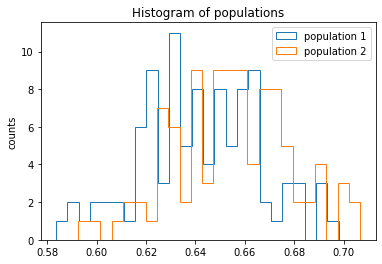

In [356]:
from matplotlib import pyplot as plt
x = test_acc_KNN
y = test_acc_LR

n = len(x)
m = len(y)

plt.hist(x, 25, histtype='step', label = 'population 1')
plt.hist(y, 25, histtype='step', label = 'population 2')
plt.title('Histogram of populations')
plt.ylabel('counts')
plt.legend()
plt.show()

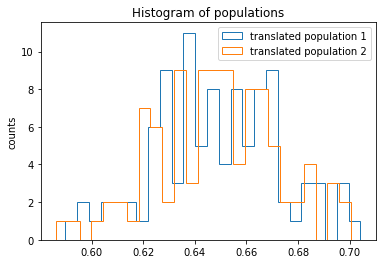

The mean of x_tilde is: 0.6484457478005865
The mean of y_tilde is: 0.6484457478005862

The variance of x_tilde is: 0.0005780824038320957
The variance of y_tilde is: 0.0005486915317205733

------------------------ 

The mean of x is: 0.6422287390029326
The mean of y is: 0.6546627565982406

The variance of x is: 0.0005780824038320957
The variance of y is: 0.0005486915317205734


In [357]:
def compute_t(x,y):
    n = len(x)
    m = len(y)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    sigma2_x = np.var(x)
    sigma2_y = np.var(y)

    return( (mean_x - mean_y)/np.sqrt(sigma2_x/n + sigma2_y/m))

# Hypothesis testing
# E(X) = E(Y)

# Observed statistic
t_obs = compute_t(x,y)

# concatenated data for centering the distributions
z = np.concatenate([x, y])

mean_x = np.mean(x)
mean_y = np.mean(y)


# Translating the data around avg(z)
x_tilde = x - mean_x + np.mean(z)
y_tilde = y - mean_y + np.mean(z)


plt.hist(x_tilde, 25, histtype='step', label = 'translated population 1')
plt.hist(y_tilde, 25, histtype='step', label = 'translated population 2')
plt.title('Histogram of populations')
plt.ylabel('counts')
plt.legend()
plt.show()


print('The mean of x_tilde is: ' + str(np.mean(x_tilde)))
print('The mean of y_tilde is: ' + str(np.mean(y_tilde)))

print('\nThe variance of x_tilde is: ' + str(np.var(x_tilde)))
print('The variance of y_tilde is: ' + str(np.var(y_tilde)))


print('\n------------------------ \n\nThe mean of x is: ' + str(np.mean(x)))
print('The mean of y is: ' + str(np.mean(y)))

print('\nThe variance of x is: ' + str(np.var(x)))
print('The variance of y is: ' + str(np.var(y)))

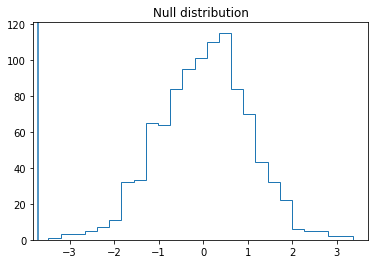

The bootstrap significance of the test is: 0.0


In [358]:
# We now concatenate the centered data and sample from it
z_tilde = np.concatenate([x_tilde, y_tilde])

# Number of bootstrap samples
B = 1000

# We generate B samples 
b_sample = np.random.choice(z_tilde, (B, n+m), replace=True)

# For each pair of bootstrap samples we compute the associated statistic 
t_bootstrap = []
for i in range(B):
    x_simulated = b_sample[i,:n]
    y_simulated = b_sample[i,n:]
    t_bootstrap.append(compute_t(x_simulated, y_simulated))

# Plotting the null hypothesis distribution
plt.hist(t_bootstrap, 25, histtype='step')
plt.title('Null distribution')
plt.axvline(x = t_obs)
plt.show()

# Computing the significance of our test
bootstrap_stat = np.sum(np.abs(t_obs)>np.abs(t_bootstrap))/B

print('The bootstrap significance of the test is: ' + str(1-bootstrap_stat))

In [359]:
print('95% confidence interval for the null distribution: ',  np.quantile(t_bootstrap, [0.025, 0.975]))
print('observed statistic: ', t_obs)

95% confidence interval for the null distribution:  [-1.93554857  1.87808123]
observed statistic:  -3.704188519799394


We used B = 1000 bootstrap steps in the experiment. The significance result is 0.044.

__Exercise 3 (2 pts).__ Use the information criteria to decide what is the best polynomial model that explains the relatioship between FDG (predictor) and ADAS11 (target) in the group MCI? And in the group NL? 

In [360]:
dataset[:10].head()

,Unnamed: 0,RID,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG,DX
0,1,2,0.004200,74.3,1,16,10.67,1.369264,NL
1,16,3,0.002769,81.3,1,18,22.00,1.090790,Dementia
2,27,5,0.004312,73.7,1,16,8.67,1.297990,NL
3,46,8,0.004355,84.5,2,18,5.00,1.276278,NL
4,60,10,0.003728,73.9,2,12,12.33,1.118814,Dementia


##Group NL

In [452]:
#df2 = dataset[["FDG", "ADAS11","DX"]]
df2 = dataset
df2= df2[df2["DX"]=="NL"]


In [453]:
df2= df2.drop(columns=["DX"])
df2.head(2)


,Unnamed: 0,RID,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG
0,1,2,0.004200,74.3,1,16,10.67,1.369264
2,27,5,0.004312,73.7,1,16,8.67,1.297990


In [454]:

y = df2[["ADAS11"]]
#x = df2.drop(columns=["ADAS11"])
x = df2[["FDG"]]



In [455]:
x.head(2)

,FDG
0,1.369264
2,1.297990


In [456]:
y.head(2)

,ADAS11
0,10.67
2,8.67


In [457]:
x= np.array(x)
y= np.array(y)

In [458]:
x.shape, y.shape

((358, 1), (358, 1))

In [459]:
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):

    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

[1794.5733135290413, 1789.1420795647186, 1789.5813291736818, 1790.1616901604543, 1790.1985824652907]
2


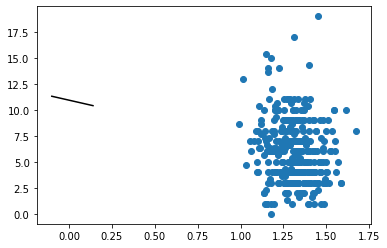

In [460]:
AIC = []
BIC = []



plt.scatter(x,y)
x=x.reshape((358,))
y=y.reshape((358,))
poly_order = [1,2,3,4,5]

for n_elements in poly_order:
    x_poly = np.array([x**i for i in range(n_elements)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y)

    training_ll = Gaussian_loglik(x_poly,y,w_ml,sigma2_ml)
    AIC.append(-2*training_ll + 2*n_elements)
    BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
    
print(AIC)
model = poly_order[np.argmin(AIC)]

print(model)
x_poly = np.array([x**i for i in range(model)]).T
w_ml, sigma2_ml = fit_poly(x_poly,y)

x_plot = np.arange(-0.1,0.15,0.01)
x_poly_plot = np.array([x_plot**i for i in range(model)]).T

plt.plot(x_plot, x_poly_plot.dot(w_ml), color = 'black')
plt.show()


#GROUP MCI

In [466]:
#df2 = dataset[["FDG", "ADAS11","DX"]]
df2 = dataset
df2= df2[df2["DX"]=="MCI"]


In [467]:
df2= df2.drop(columns=["DX"])
df2.head(2)


,Unnamed: 0,RID,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG
11,264,51,0.003852,66.5,1,18,9.67,1.369772
13,282,54,0.003241,81.0,2,20,20.33,0.935916


In [468]:

y = df2[["ADAS11"]]
#x = df2.drop(columns=["ADAS11"])
x = df2[["FDG"]]



In [469]:
y.head(2)

,ADAS11
11,9.67
13,20.33


In [470]:
x= np.array(x)
y= np.array(y)

In [471]:
x.shape, y.shape

((575, 1), (575, 1))

In [472]:
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):

    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

[3316.3590094644487, 3227.4151567915223, 3226.649502776407, 3223.9163938040588, 3220.9016421448896]
5


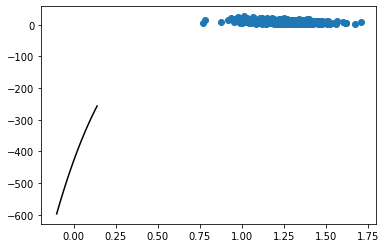

In [474]:
AIC = []
BIC = []



plt.scatter(x,y)
x=x.reshape((x.shape[0],))
y=y.reshape((y.shape[0],))
poly_order = [1,2,3,4,5]

for n_elements in poly_order:
    x_poly = np.array([x**i for i in range(n_elements)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y)

    training_ll = Gaussian_loglik(x_poly,y,w_ml,sigma2_ml)
    AIC.append(-2*training_ll + 2*n_elements)
    BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
    
print(AIC)
model = poly_order[np.argmin(AIC)]

print(model)
x_poly = np.array([x**i for i in range(model)]).T
w_ml, sigma2_ml = fit_poly(x_poly,y)

x_plot = np.arange(-0.1,0.15,0.01)
x_poly_plot = np.array([x_plot**i for i in range(model)]).T

plt.plot(x_plot, x_poly_plot.dot(w_ml), color = 'black')
plt.show()


__Exercise 4 (1.5 pts).__ What is the best combination of variables (excluded DX) for predicting ADAS11 with a linear model?

In [511]:
df3 = dataset
df3= df3.drop(columns=["DX"])
df3.head(2)


,Unnamed: 0,RID,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG
0,1,2,0.004200,74.3,1,16,10.67,1.369264
1,16,3,0.002769,81.3,1,18,22.00,1.090790


In [512]:

y = df3[["ADAS11"]]
x = df3.drop(columns=["ADAS11"])


x.shape, y.shape

((1135, 7), (1135, 1))

In [513]:
x= np.array(x)
y= np.array(y)

In [514]:
#x = x.reshape((1135,))
#y = y.reshape((1135,))

In [517]:
import itertools

# Supporting functions for model fitting
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):
    w_ml = np.linalg.solve(x.dot(x),x.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

In [518]:
# case all features

predictor_all = x

w_all, sigma2_all = fit_poly(predictor_all,y)
deviance_all = -2*Gaussian_loglik(predictor_all,y, w_all, sigma2_all)

penalization_AIC = 2 * len(w_all)
penalization_BIC = 2 * len(w_all) * np.log(x.shape[0])
penalization_AICc = penalization_AIC + 2*len(w_all)*(len(w_all)+1)/(x.shape[0]-len(w_all)-1)

AIC_all = deviance_all + penalization_AIC
BIC_all = deviance_all + penalization_BIC
AICc_all = deviance_all + penalization_AICc

print('All features')
print('Dev' , 'AIC', 'BIC', 'AICc')
print(round(deviance_all), round(AIC_all), round(BIC_all), round(AICc_all))

# case last 3 features

predictor_3 = x[:,2:]
w_3, sigma2_3 = fit_poly(predictor_3,y)
deviance_3 = -2*Gaussian_loglik(predictor_3,y, w_3, sigma2_3)

penalization_AIC = 2 * len(w_3)
penalization_BIC = 2 * len(w_3) * np.log(x.shape[0])
penalization_AICc = penalization_AIC + 2*len(w_3)*(len(w_3)+1)/(x.shape[0]-len(w_3)-1)

AIC_3 = deviance_3 + penalization_AIC
BIC_3 = deviance_3 + penalization_BIC
AICc_3 = deviance_3 + penalization_AICc

print('3 features')
print('Dev' , 'AIC', 'BIC', 'AICc')
print(round(deviance_3), round(AIC_3), round(BIC_3), round(AICc_3))



ValueError: ignored

In [ ]:
AIC = []
AICc = []
BIC = []
model = []
ll = []
coef = []
sigma2 = []

# For each number of parameters in the model
for n_elements in range(1,d+1):
    # For each combination of variables
    for indices in itertools.combinations(range(d),n_elements):

        # Store the indices corresponding to the parameters
        model.append(indices)
        
        # Fit the model
        x_train = x[:,indices].reshape(x.shape[0],n_elements)
        w_ml, sigma2_ml = fit_poly(x_train,y)
        
        # compute the log-likelihhod
        training_ll = Gaussian_loglik(x_train,y,w_ml,sigma2_ml)
        
        # store the coefficients
        coeffs = np.zeros(d)
        coeffs[[indices]] = w_ml        
        coef.append(coeffs)
        sigma2.append(sigma2_ml)
        
        # store all the metrics
        ll.append( -training_ll)
        AIC.append(-2*training_ll + 2*n_elements)
        AICc.append(-2*training_ll + 2*n_elements + 2.*n_elements*(n_elements+1)/(x.shape[0]-n_elements-1))
        BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
 


results = pd.DataFrame({'model': model, 'AIC': AIC, 'AICc': AICc, 'BIC' :BIC, 
                                 'neg_loglik' : ll, 'coef' : coef, 'sigma2' : sigma2})  
results.sort_values('AIC', ascending = True, inplace = True)
results.reset_index(inplace = True)
model_comparison = results[['model', 'AIC', 'AICc', 'BIC', 'neg_loglik']]

fitted_models = results[['model', 'coef', 'sigma2']]

model_comparison[:10]

__Exercise 5 (1 pts).__ Consider only the healtiest subjects for which diagnosis == NL and ADAS11 < 5. Compare the performance of the classifiers of Exercise 1 for discriminating this group from the group MCI.

__Exercise 6 (1 pts).__ Is it true that a model with the lowest AIC is the best one? 

No becasue AIC is just one evaluation metric. There are also other methods in the literature such as AICc,  Bayesian information criterion (BIC). Sometimes models with very similiar and high AIC provide very comparable generalization error.

BIC is generally more conservative than AIC. This is because BIC tends to favour the most conservative model, under the assumption that a true model for the data exists. AIC is related to the out-of-sample prediction, and therefore may not point to the true model generating the data, but to the one with best predictive performance.

__Exercise 7 (1 pts).__ Explain the concept of bias-variance decomposition

First let's explain what is bias and what is variance.

Bias is our faulty predictions. It is the difference between our predictions and the ground truth.
Varianc  measures the variability of the predictions respect to the change in the data.

We have the following formula for the loss:

$$\textbf{Loss}  =  \mathbf{Noise} + \mathbf{Bias}^2 + \mathbf{Variance},$$

We want bias and variance as low as possbile in our model to reduce loss.

The bias-variance trade-off is closely related to the aspect of training-testing error. We make a graphical representation of our bias and variance of out model and chose the best model that provides lowest bias + variance.

__Exercise 8 (1 pts).__ From Exercise 1 compute the probability that the average prediction accuracy of Logistic classifier is greater than 0.66.

In [ ]:
#test_acc_LR

In [ ]:
dff = pd.DataFrame(test_acc_LR, columns=['test_acc_LR'])

In [ ]:
dff.head(3)

In [ ]:
nom = len(dff[dff["test_acc_LR"] > 0.66])
denom = len(dff)
print("The probability that the average prediction accuracy of Logistic classifier is greater than 0.66 is =")
print( nom/denom )